# Robust Principal Component Analysis(RPCA)

- Decompose a matrix into low-rank and sparse components
$$ M = L + S $$
- where $L$ is low-rank and $S$ is sparse
- Used VIRAT dataset to test the algorithm

In [42]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

## 1. Data Load
- Load the matrix(numpy) data from the video file
- Used `cv2.VideoCapture`

In [39]:
from Converter import convert_video

data = convert_video("data/sample1.mp4", gray=True)
data = data.reshape(data.shape[0], -1).T
print("Converted shape : ", data.shape)

Video is read successfully.
Shape :  (584, 720, 1280)
Converted shape :  (921600, 584)


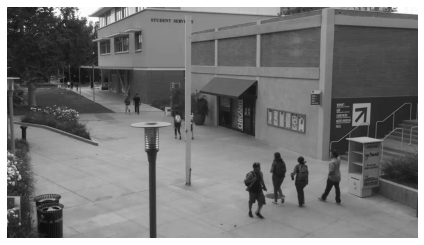

In [41]:
# Visualize first frame

plt.imshow(data.T[0].reshape(720, 1280), cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()

## 2. Algorithm
Robust PCA by Manifold Optimization (Teng Zhang, 2018)

In [ ]:
def RPCA(Y, r, gamma, eta):
    

## 3. Result

In [7]:
# Parameters for Robust PCA

def morpca()

In [1]:
from threshold import threshold
import numpy as np

X = np.random.randn(50, 50)

sparsity = np.random.randint(0, 2, (50, 50))
gamma = 0.5

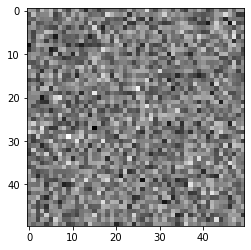

In [2]:
import matplotlib.pyplot as plt

plt.imshow(X, cmap='gray')

In [3]:
X_thresholded = threshold(X, gamma, sparsity)

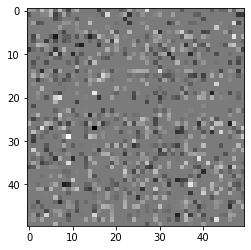

In [4]:
plt.imshow(X_thresholded, cmap='gray')

np.transpose(L) elapsed time: 0.0001239776611328125
L.T elapsed time: 4.410743713378906e-05
Arrays equal: True
